In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import numpy as np
import sklearn.linear_model

path = "/Users/noa/Desktop/Business Analytics/"
Stroke = pd.read_csv(path +"healthcare-dataset-stroke-data.csv")

In [63]:
Stroke = Stroke.drop("id", axis = 1)
Stroke = pd.get_dummies(Stroke, drop_first = True)

In [64]:
Stroke_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Male', 'gender_Other', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private','work_type_Self-employed', 'work_type_children' ,'Residence_type_Urban','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']
len(Stroke_columns)

16

In [84]:
Stroke = Stroke.dropna()
y = Stroke["stroke"]
X = Stroke.drop("stroke", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [87]:
X_train = sm.add_constant(X_train)
default = sm.Logit(y_train, X_train)
default = default.fit()

         Current function value: 0.137991
         Iterations: 35


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [88]:
print(default.summary())

                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 3436
Model:                          Logit   Df Residuals:                     3419
Method:                           MLE   Df Model:                           16
Date:                Sat, 07 May 2022   Pseudo R-squ.:                  0.2109
Time:                        20:22:31   Log-Likelihood:                -474.14
converged:                      False   LL-Null:                       -600.87
Covariance Type:            nonrobust   LLR p-value:                 1.008e-44
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -8.3286      0.803    -10.372      0.000      -9.902      -6.755
age                                0.0711      0.008      9.422      0.

In [89]:
default.params

const                             -8.328646
age                                0.071130
hypertension                       0.412098
heart_disease                      0.274531
avg_glucose_level                  0.005046
bmi                                0.003044
gender_Male                       -0.063727
gender_Other                     -12.326024
ever_married_Yes                   0.090034
work_type_Never_worked           -33.545820
work_type_Private                  0.050469
work_type_Self-employed           -0.388150
work_type_children                -9.739837
Residence_type_Urban               0.116789
smoking_status_formerly smoked     0.404236
smoking_status_never smoked        0.182412
smoking_status_smokes              0.696359
dtype: float64

In [90]:
standardized_effects = X_train.std() * default.params 
standardized_effects

const                            -0.000000
age                               1.600236
hypertension                      0.120449
heart_disease                     0.059377
avg_glucose_level                 0.225440
bmi                               0.023497
gender_Male                      -0.031342
gender_Other                     -0.210279
ever_married_Yes                  0.042870
work_type_Never_worked           -2.354087
work_type_Private                 0.024924
work_type_Self-employed          -0.138905
work_type_children               -3.332265
Residence_type_Urban              0.058351
smoking_status_formerly smoked    0.150707
smoking_status_never smoked       0.088452
smoking_status_smokes             0.251164
dtype: float64

In [91]:
y_test_pred = default.predict(sm.add_constant(X_test))
y_test_pred.head(10)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2648    3.406556e-02
3441    4.417140e-02
4935    1.597663e-03
1316    3.274870e-03
3271    8.048772e-03
1628    1.854436e-01
843     1.404389e-03
1046    1.144721e-02
2721    4.505539e-18
2731    2.495393e-02
dtype: float64

In [92]:
y_test_predclass = (y_test_pred > 0.1).astype(int)
y_test_predclass.head(10)

2648    0
3441    0
4935    0
1316    0
3271    0
1628    1
843     0
1046    0
2721    0
2731    0
dtype: int64

In [93]:
confusion_matrix(y_test, y_test_predclass)

array([[1240,  169],
       [  26,   38]])

In [94]:
print(classification_report(y_test, y_test_predclass))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1409
           1       0.18      0.59      0.28        64

    accuracy                           0.87      1473
   macro avg       0.58      0.74      0.60      1473
weighted avg       0.94      0.87      0.90      1473



In [95]:
roc_auc_score(y_test, y_test_pred)

0.8527324343506033

In [96]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

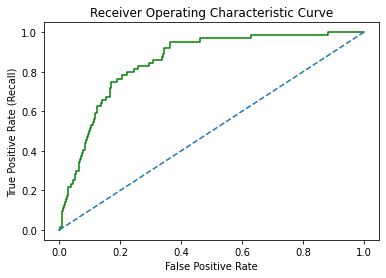

In [97]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color="green")
ax.plot([0,1],[0,1], "--")

ax.set_title("Receiver Operating Characteristic Curve")
ax.set_ylabel("True Positive Rate (Recall)")
ax.set_xlabel("False Positive Rate")
plt.show()

In [98]:
J = tpr - fpr
thresholds[np.argmax(J)]

0.02516029359246282